In [1]:
import awkward as ak
import numpy as np

In [2]:
import vector
vector.register_awkward()

In [3]:
events = ak.from_parquet("data/SMHiggsToZZTo4L.parquet")

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

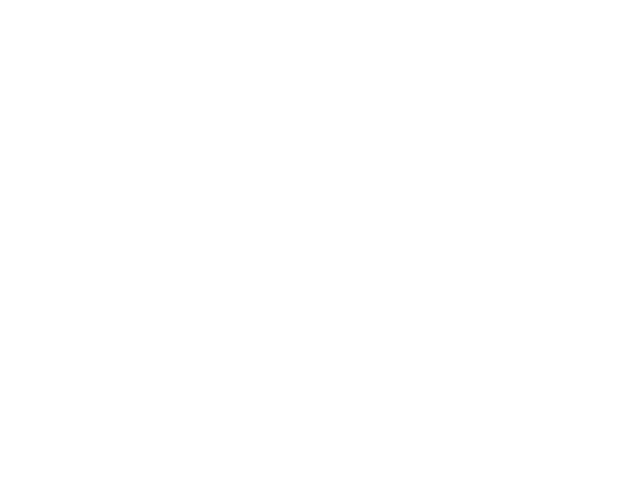

In [5]:
%matplotlib widget

fig = plt.figure()

In [13]:
def beam(ax):
    ax.plot([0, 0], [0, 0], [-100, 100], c="black", ls=":")

def cms(ax):
    z = np.linspace(-100, 100, 50)
    theta = np.linspace(0, 2*np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 100*np.cos(theta_grid)
    y_grid = 100*np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

In [25]:
fig.clf()
ax = fig.add_subplot(111, projection='3d')

for event in events[:3]:   # 6417 : 6417 + 1
    for p in event.electron:
        x0 = event.PV.x - p.dxy*np.cos(p.phi)
        y0 = event.PV.y - p.dxy*np.sin(p.phi)
        z0 = event.PV.z - p.dz
        ax.plot([x0, x0 + p.px], [y0, y0 + p.py], [z0, z0 + p.pz], c="blue")
    for p in event.muon:
        x0 = event.PV.x - p.dxy*np.cos(p.phi)
        y0 = event.PV.y - p.dxy*np.sin(p.phi)
        z0 = event.PV.z - p.dz
        ax.plot([x0, x0 + p.px], [y0, y0 + p.py], [z0, z0 + p.pz], c="green")

beam(ax)
cms(ax)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
None